In [13]:
import pandas as pd
import cv2
import json

In [14]:
data_1 = pd.read_excel('wire_test.xlsx')

In [15]:
data = pd.read_csv('train_nos.csv')

In [16]:
data_1

,Image,No of yellow wires,dought *
0,1,1,NaN
1,2,4,not clear
2,3,2,NaN
3,4,3,NaN
4,5,0,NaN
5,6,1,NaN
6,7,2,NaN
7,8,0,NaN
8,9,1,NaN
9,10,3,NaN


In [17]:
import os

In [18]:
lst  = os.listdir("test_images")

In [19]:
paths = ["test_images/" + x for x in lst]

In [20]:
from skimage.io import imshow, imread
import requests

result_dict1 = {}

for path in paths:
    
    print(path)
    url = "http://127.0.0.1:5002/users"
    
    blur= path+str(int(data_1[data_1['Image']==int(path.split('/')[1][:-4])]['No of  yellow wires']))

    content_type = 'image/jpeg'
    headers = {'content-type': content_type,'blur':blur}

    img = cv2.imread(path)
    _, img_encoded = cv2.imencode('.jpg', img)
    response = requests.post(url, data=img_encoded.tostring(), headers=headers)
    try:
        result_dict1[path] = json.loads(response.text)['no_wires']
    except:
        result_dict1[path] = 'error'

test_images/1.jpg


/tmp/ipykernel_1532/1393750763.py:18: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  response = requests.post(url, data=img_encoded.tostring(), headers=headers)


test_images/8.JPG
test_images/21.jpg
test_images/3.jpg
test_images/4.jpg
test_images/18.jpg
test_images/10.jpg
test_images/7.jpg
test_images/13.jpg
test_images/11.jpg
test_images/2.JPG
test_images/12.jpg
test_images/9.jpg
test_images/5.jpg
test_images/25.jpg
test_images/24.jpg
test_images/22.jpg
test_images/15.JPG
test_images/19.jpg
test_images/23.jpg
test_images/6.JPG
test_images/20.jpg
test_images/17.jpg


Invalid SOS parameters for sequential JPEG


test_images/16.jpg
test_images/14.jpg


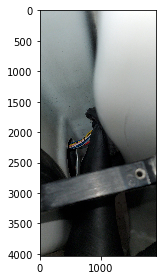

In [21]:
imshow(paths[-1])

In [22]:
json.loads(response.text)

{'no_wires': 3}

In [23]:
result_dict1

{'test_images/1.jpg': 1,
 'test_images/8.JPG': 'error',
 'test_images/21.jpg': 1,
 'test_images/3.jpg': 'error',
 'test_images/4.jpg': 'error',
 'test_images/18.jpg': 0,
 'test_images/10.jpg': 3,
 'test_images/7.jpg': 2,
 'test_images/13.jpg': 'error',
 'test_images/11.jpg': 2,
 'test_images/2.JPG': 'error',
 'test_images/12.jpg': 2,
 'test_images/9.jpg': 2,
 'test_images/5.jpg': 0,
 'test_images/25.jpg': 1,
 'test_images/24.jpg': 'error',
 'test_images/22.jpg': 0,
 'test_images/15.JPG': 1,
 'test_images/19.jpg': 2,
 'test_images/23.jpg': 2,
 'test_images/6.JPG': 'error',
 'test_images/20.jpg': 1,
 'test_images/17.jpg': 'error',
 'test_images/16.jpg': 3,
 'test_images/14.jpg': 3}

In [24]:
results1 = pd.DataFrame(columns  = ['image','count'],data=[[a,b] for a,b in result_dict1.items()])

In [25]:
results1['image']= results1['image'].apply(lambda x : x.split("/")[1][-6:-4]).astype(int)

In [26]:
data_1.head()

,Image,No of yellow wires,dought *
0,1,1,NaN
1,2,4,not clear
2,3,2,NaN
3,4,3,NaN
4,5,0,NaN


In [27]:
results1 = results1.merge(data_1,how='left',left_on ='image',right_on = "Image")

In [28]:
results1 = results1[results1['count']!= 'error']

In [29]:
results1[['image','count','No of  yellow wires']]

,image,count,No of yellow wires
0,1,1,1
2,21,1,2
5,18,0,0
6,10,3,3
7,7,2,2
9,11,2,5
11,12,2,1
12,9,2,1
13,5,0,0
14,25,1,2


In [30]:
results1.columns

Index(['image', 'count', 'Image', 'No of  yellow wires', 'dought  *'], dtype='object')

In [31]:
a  = (results1['count'] == results1['No of  yellow wires'])

In [32]:
a.sum()/a.count()

0.6470588235294118

In [33]:
import json
import cv2
  
f = open('/root/labelstudio/result.json')
  
dataset_dicts = json.load(f)

dataset_dicts.keys()

imgs = dataset_dicts['images']

img_path = '/labelstudio/images/'

In [34]:
from skimage.io import imshow, imread
import requests

result_dict = {}

for img in imgs:
    
    name  = img['file_name']
    
    print(name)
    tagged_count = name+str(int(data[data['image']== int(name[-7:-4])]['number of yellow wires']))

    path = "../../"+img_path + name

    url = "http://127.0.0.1:5002/users"

    content_type = 'image/jpeg'
    headers = {'content-type': content_type,"blur":tagged_count}

    img = cv2.imread(path)
    _, img_encoded = cv2.imencode('.jpg', img)
    response = requests.post(url, data=img_encoded.tostring(), headers=headers)
    try:
        result_dict[name] = json.loads(response.text)['no_wires']
    except:
        result_dict[name] = 'error'

82e70341-IMG_0331.JPG


/tmp/ipykernel_1532/3444433178.py:22: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  response = requests.post(url, data=img_encoded.tostring(), headers=headers)


f7cae16f-IMG_0330.JPG
90798fb9-IMG_0329.JPG
ea30c502-IMG_0326.JPG
677d6212-IMG_0323.JPG
991068d7-IMG_0322.JPG
84699595-IMG_0321.JPG
1ea3cfcf-IMG_0320.JPG
59b6b761-IMG_0319.JPG
efb3e0be-IMG_0318.JPG
c17bf3e5-IMG_0316.JPG
4be9289f-IMG_0313.JPG
b9799882-IMG_0332.JPG
21d68f79-IMG_0333.JPG
00f6131a-IMG_0334.JPG
2a34357f-IMG_0312.JPG
bb3483c5-IMG_0335.JPG
07718b07-IMG_0336.JPG
0b6e259b-IMG_0311.JPG
084d3a58-IMG_0337.JPG
51537c0e-IMG_0338.JPG
026e8489-IMG_0309.JPG
604af086-IMG_0339.JPG
a3582be5-IMG_0340.JPG
785d78b4-IMG_0342.JPG
3ee498ab-IMG_0343.JPG
d62825b3-IMG_0344.JPG
0085c7f5-IMG_0345.JPG
b3151cf3-IMG_0346.JPG
65266110-IMG_0347.JPG
6f0fd4cc-IMG_0348.JPG
0e216299-IMG_0349.JPG
9e66eb06-IMG_0350.JPG
1a2c184f-IMG_0352.JPG
122478f8-IMG_0353.JPG
b85cd6e3-IMG_0308.JPG
64d16c58-IMG_0306.JPG
909978fb-IMG_0304.JPG
30e43cf0-IMG_0303.JPG
ca4491cd-IMG_0302.JPG
9ab8ffff-IMG_0301.JPG
7e6286d9-IMG_0300.JPG
0f769699-IMG_0354.JPG
1dd8d0a8-IMG_0355.JPG
ce5958f1-IMG_0359.JPG
521f6667-IMG_E0297.JPG
e41a0695-

In [23]:
# from skimage.io import imshow, imread
# import requests
# dic_test_images={
#     "image_name":"label"
# }
# result_dict = {}

# for k,v in dic_test_images.keys():
    
#     name  = img['file_name']
    
#     print(name)

#     path = "../../"+img_path + name

#     url = "http://127.0.0.1:5002/users"

#     content_type = 'image/jpeg'
#     headers = {'content-type': content_type}

#     img = cv2.imread(path)
#     _, img_encoded = cv2.imencode('.jpg', img)
#     response = requests.post(url, data=img_encoded.tostring(), headers=headers)
#     try:
#         result_dict[name] = json.loads(response.text)['no_wires']
#     except:
#         result_dict[name] = 'error'

In [35]:
results = pd.DataFrame(columns  = ['image','count'],data=[[a,b] for a,b in result_dict.items()])

In [36]:
results['image']= results['image'].apply(lambda x : x[-7:-4]).astype(int)

In [37]:
results = results[results['count']!= 'error']

In [38]:
results.head()

,image,count
0,331,1
1,330,0
2,329,0
3,326,1
4,323,0


In [39]:
# list(map(lambda x: x[-7:-4],list(result_dict.keys())))

In [40]:
data.head()

,image,number of yellow wires
0,294,1
1,295,1
2,297,1
3,298,1
4,299,1


In [41]:
results = results.merge(data,how='left',on ='image')

In [42]:
a  = (results['count'] == results['number of yellow wires'])

In [43]:
a.sum()/a.count()

0.84

In [44]:
results1

,image,count,Image,No of yellow wires,dought *
0,1,1,1,1,NaN
2,21,1,21,2,NaN
5,18,0,18,0,NaN
6,10,3,10,3,NaN
7,7,2,7,2,NaN
9,11,2,11,5,not clear
11,12,2,12,1,NaN
12,9,2,9,1,NaN
13,5,0,5,0,NaN
14,25,1,25,2,NaN


In [45]:
results

,image,count,number of yellow wires
0,331,1,1
1,330,0,0
2,329,0,0
3,326,1,1
4,323,0,0
5,322,1,1
6,321,0,0
7,320,0,0
8,319,0,0
9,318,0,0


In [46]:
results.columns = ['image','count','No of  yellow wires']

In [47]:
results12 = results1[['image','count','No of  yellow wires']].append(results)

/tmp/ipykernel_1532/1838713815.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results12 = results1[['image','count','No of  yellow wires']].append(results)


In [48]:
results12

,image,count,No of yellow wires
0,1,1,1
2,21,1,2
5,18,0,0
6,10,3,3
7,7,2,2
...,...,...,...
45,297,1,1
46,299,1,1
47,294,1,1
48,298,1,1


In [49]:
a  = (results12['count'] == results12['No of  yellow wires'])
a.sum()/a.count()

0.7910447761194029

In [50]:
pvt = results12.pivot_table(index='No of  yellow wires',columns='count',aggfunc='count').fillna(0)
pvt

image                
count                   0     1    2    3
No of  yellow wires                      
0                    13.0   1.0  0.0  0.0
1                     0.0  33.0  9.0  0.0
2                     0.0   3.0  4.0  0.0
3                     0.0   0.0  0.0  3.0
5                     0.0   0.0  1.0  0.0

In [51]:
round(pvt*100/pvt.sum().sum(),1)

image                 
count                   0     1     2    3
No of  yellow wires                       
0                    19.4   1.5   0.0  0.0
1                     0.0  49.3  13.4  0.0
2                     0.0   4.5   6.0  0.0
3                     0.0   0.0   0.0  4.5
5                     0.0   0.0   1.5  0.0

In [52]:
results12['replace'] = results12['No of  yellow wires'].apply(lambda x: 1 if x>1 else 0)
results12['replace_True'] = results12['count'].apply(lambda x: 1 if x>1 else 0)

In [53]:
a  = (results12['replace'] == results12['replace_True'])
a.sum()/a.count()

0.8208955223880597

In [43]:

## Replace or Not
#- False Positive - 12.9%

##--- Risky cases
#- False Negative - 2.9%